# Customer Data Analysis for Business Insights

In [2]:
# Loading Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Load Data and Initial Inspection

In [3]:
# Loading Dataset

customer_master = pd.read_csv("Customer_Master_Data.csv")
customer_transaction = pd.read_csv("Customer_Transactions.csv")

***

In [4]:
# Shape of Customer Master Data dataset

print('The Shape of the Customer Master Data dataset is',customer_master.shape)

The Shape of the Customer Master Data dataset is (1000, 9)


***KEY INSIGHTS :- There are total 1000 rows and 9 colums in Customer_Master_Data.***

In [5]:
# Shape of Customer Transaction dataset

print('The Shape of the Customer Transaction dataset is',customer_transaction.shape)

The Shape of the Customer Transaction dataset is (23050, 3)


***KEY INSIGHTS :- There are total 23050 rows and 3 colums in Customer_Transactions.***

***

In [6]:
# Data Types of Customer Master Data dataset

customer_master.dtypes

CustomerID       object
Name             object
Email            object
Gender           object
Age               int64
City             object
MaritalStatus    object
NumChildren       int64
JoinDate         object
dtype: object

In [7]:
# Details of Customer Master Data dataset

customer_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1000 non-null   object
 1   Name           1000 non-null   object
 2   Email          1000 non-null   object
 3   Gender         1000 non-null   object
 4   Age            1000 non-null   int64 
 5   City           1000 non-null   object
 6   MaritalStatus  1000 non-null   object
 7   NumChildren    1000 non-null   int64 
 8   JoinDate       1000 non-null   object
dtypes: int64(2), object(7)
memory usage: 70.4+ KB


***

In [8]:
# Null Values in Customer Master Data dataset

customer_master.isnull().sum()

CustomerID       0
Name             0
Email            0
Gender           0
Age              0
City             0
MaritalStatus    0
NumChildren      0
JoinDate         0
dtype: int64

In [9]:
# Null Values in Customer Transaction dataset

customer_transaction.isnull().sum()

CustomerID           0
TransactionDate      0
TransactionAmount    0
dtype: int64

***KEY INSIGHTS :- There is no null values in both file. (Customer_Master_Data & Customer_Transactions)***

***

In [10]:
# Top 5 rows of the Customer Master Data dataset

customer_master.head()

,CustomerID,Name,Email,Gender,Age,City,MaritalStatus,NumChildren,JoinDate
0,CUST10000,Onkar Bhargava,pkeer@yahoo.com,Male,54,Delhi,Divorced,0,2021-02-22
1,CUST10001,Divit Kohli,mkalita@sarin.com,Female,48,Kolkata,Married,0,2023-12-06
2,CUST10002,Kiara Behl,apteanay@hotmail.com,Male,75,Kolkata,Widowed,2,2023-08-23
3,CUST10003,Vaibhav Sankar,bseshadri@choudhry.info,Male,62,Pune,Divorced,2,2022-11-17
4,CUST10004,Shray D’Alia,bdhillon@toor-mall.com,Male,55,Delhi,Divorced,0,2022-12-04


In [11]:
# Top 5 rows of the Customer Transaction dataset

customer_transaction.head()

,CustomerID,TransactionDate,TransactionAmount
0,CUST10771,7/31/2023,2383.07
1,CUST10100,3/10/2024,497.54
2,CUST10031,2/17/2025,536.78
3,CUST10987,7/17/2023,314.89
4,CUST10831,12/15/2024,2543.19


***

In [12]:
# Converting the date columns to datetime

customer_master['JoinDate'] = pd.to_datetime(customer_master['JoinDate'])
customer_transaction['TransactionDate'] = pd.to_datetime(customer_transaction['TransactionDate'])


In [13]:
customer_master.dtypes

CustomerID               object
Name                     object
Email                    object
Gender                   object
Age                       int64
City                     object
MaritalStatus            object
NumChildren               int64
JoinDate         datetime64[ns]
dtype: object

In [14]:
customer_transaction.dtypes

CustomerID                   object
TransactionDate      datetime64[ns]
TransactionAmount           float64
dtype: object

***

In [15]:
# number of unique customers in the dataset

print('The number of unique customers in the dataset is',customer_master.CustomerID.nunique())
print('The number of unique customers in the dataset is',customer_transaction.CustomerID.nunique())

The number of unique customers in the dataset is 1000
The number of unique customers in the dataset is 1000


***

# 2. Clean and Prepare Data

In [16]:
# Finding Duplicates

print('The number of duplicates in the dataset is',customer_master.duplicated().sum())
print('The number of duplicates in the dataset is',customer_transaction.duplicated().sum())

The number of duplicates in the dataset is 0
The number of duplicates in the dataset is 0


***KEY INSIGHTS :- There are no duplicate values in both dataset***

***

In [17]:
# Confirm that all CustomerIDs in transactions exist in the master list

missing = set(customer_transaction['CustomerID']) - set(customer_master['CustomerID'])
assert not missing  # should be empty if all are valid

missing

set()

***KEY INSIGHTS :- All CustomerIDs in customer_transaction exist in customer_master***

***

In [18]:
# Merging the datasets

merged_dataset = pd.merge(customer_master, customer_transaction, how='left', on='CustomerID')
merged_dataset.head()

,CustomerID,Name,Email,Gender,Age,City,MaritalStatus,NumChildren,JoinDate,TransactionDate,TransactionAmount
0,CUST10000,Onkar Bhargava,pkeer@yahoo.com,Male,54,Delhi,Divorced,0,2021-02-22,2022-10-03,961.52
1,CUST10000,Onkar Bhargava,pkeer@yahoo.com,Male,54,Delhi,Divorced,0,2021-02-22,2024-05-31,92.16
2,CUST10000,Onkar Bhargava,pkeer@yahoo.com,Male,54,Delhi,Divorced,0,2021-02-22,2024-05-31,1153.74
3,CUST10000,Onkar Bhargava,pkeer@yahoo.com,Male,54,Delhi,Divorced,0,2021-02-22,2023-01-31,1217.04
4,CUST10000,Onkar Bhargava,pkeer@yahoo.com,Male,54,Delhi,Divorced,0,2021-02-22,2022-06-12,912.08


In [19]:
merged_dataset.sample()

,CustomerID,Name,Email,Gender,Age,City,MaritalStatus,NumChildren,JoinDate,TransactionDate,TransactionAmount
15192,CUST10654,Arnav Boase,vardaniya56@gmail.com,Female,34,Kolkata,Divorced,1,2022-01-28,2022-10-11,437.17


***

# 3. Demographic and Behavioral Profiling

In [20]:
# Gender, City, and Age

gender = customer_master['Gender'].value_counts()
city = customer_master['City'].value_counts()
age = customer_master['Age'].describe()


In [21]:
gender

Gender
Female           340
Male             332
Not Disclosed    328
Name: count, dtype: int64

***KEY INSIGHTS :- There are 340 Females, 332 Males and 328 Not Disclosed as our customers***

In [22]:
city

City
Lucknow      110
Jaipur       109
Hyderabad    104
Ahmedabad    102
Bangalore    102
Delhi         99
Mumbai        99
Pune          93
Kolkata       91
Chennai       91
Name: count, dtype: int64

***KEY INSIGHTS :- We have our customers for 10 cities around the country, Highest Customers from Lucknow (110) followed by Jaipur (109), Hyderabad (104) but have Lowest Customers from Chennai and Kolkata (91)***

In [23]:
age

count    1000.000000
mean       46.471000
std        16.582525
min        18.000000
25%        32.000000
50%        46.000000
75%        60.000000
max        75.000000
Name: Age, dtype: float64

***KEY INSIGHTS :- Our average customer age is 46***

***KEY INSIGHTS :- We have minimum age customer is 18 and maximum customer age is 75***

***

In [24]:
# Transactions per customer and spend per customer

transactions_per_customer = merged_dataset.groupby('CustomerID').size().describe()
spends_per_customer = merged_dataset.groupby('CustomerID')['TransactionAmount'].sum().describe()


In [25]:
transactions_per_customer

count    1000.000000
mean       23.050000
std         4.810472
min         6.000000
25%        20.000000
50%        23.000000
75%        26.000000
max        38.000000
dtype: float64

In [26]:
spends_per_customer

count     1000.00000
mean     23053.19966
std       5622.44101
min       5052.69000
25%      18965.46250
50%      22969.82000
75%      26827.39250
max      44784.99000
Name: TransactionAmount, dtype: float64

***

# 4. RFM Calculation

In [27]:
# Reference Date

reference_date = customer_transaction['TransactionDate'].max() + pd.Timedelta(days=1)

reference_date

Timestamp('2025-07-30 00:00:00')

In [28]:
# Recency :- Days between "today" and last transaction date

recency_df = customer_transaction.groupby('CustomerID')['TransactionDate'].max().reset_index()
recency_df.columns = ['CustomerID', 'LastPurchaseDate']
recency_df['Recency'] = (reference_date - recency_df['LastPurchaseDate']).dt.days

recency_df.head()


,CustomerID,LastPurchaseDate,Recency
0,CUST10000,2025-07-17,13
1,CUST10001,2025-06-25,35
2,CUST10002,2025-07-12,18
3,CUST10003,2025-05-10,81
4,CUST10004,2025-07-22,8


In [29]:
recency_df.describe()

,LastPurchaseDate,Recency
count,1000,1000.000000
mean,2025-06-09 04:56:38.399999744,50.794000
min,2024-02-22 00:00:00,1.000000
25%,2025-05-22 00:00:00,13.000000
50%,2025-06-28 00:00:00,32.000000
75%,2025-07-17 00:00:00,69.000000
max,2025-07-29 00:00:00,524.000000
std,NaN,58.124418


***KEY INSIGHTS :- The average recency stands at 50 days since customers' last transactions, ranging from a minimum of 1 day to a maximum of 524 days***

***

In [30]:
# Frequency: Total number of transactions.

frequency_df = customer_transaction.groupby('CustomerID').size().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

frequency_df.head()

,CustomerID,Frequency
0,CUST10000,23
1,CUST10001,30
2,CUST10002,24
3,CUST10003,25
4,CUST10004,19


In [31]:
frequency_df.describe()

,Frequency
count,1000.000000
mean,23.050000
std,4.810472
min,6.000000
25%,20.000000
50%,23.000000
75%,26.000000
max,38.000000


***KEY INSIGHTS :- Customers exhibit an average transaction frequency of 23 purchases, with a minimum of 6 and maximum of 38 transactions.***

***

In [32]:
# Monetary : Sum of all Transaction Amount values

monetary_df = customer_transaction.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

monetary_df.head()


,CustomerID,Monetary
0,CUST10000,21265.49
1,CUST10001,28654.31
2,CUST10002,23884.03
3,CUST10003,24206.03
4,CUST10004,25565.30


In [33]:
monetary_df.describe()

,Monetary
count,1000.00000
mean,23053.19966
std,5622.44101
min,5052.69000
25%,18965.46250
50%,22969.82000
75%,26827.39250
max,44784.99000


***KEY INSGHITS :- Customers demonstrate an average total spend of ₹23,053, ranging from a minimum of ₹5,053 by CUST10729 to a maximum of ₹44,785 by CUST10944***

***

In [34]:
rfm = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')

rfm.head()

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary
0,CUST10000,2025-07-17,13,23,21265.49
1,CUST10001,2025-06-25,35,30,28654.31
2,CUST10002,2025-07-12,18,24,23884.03
3,CUST10003,2025-05-10,81,25,24206.03
4,CUST10004,2025-07-22,8,19,25565.30


In [35]:
rfm.describe()

,LastPurchaseDate,Recency,Frequency,Monetary
count,1000,1000.000000,1000.000000,1000.00000
mean,2025-06-09 04:56:38.399999744,50.794000,23.050000,23053.19966
min,2024-02-22 00:00:00,1.000000,6.000000,5052.69000
25%,2025-05-22 00:00:00,13.000000,20.000000,18965.46250
50%,2025-06-28 00:00:00,32.000000,23.000000,22969.82000
75%,2025-07-17 00:00:00,69.000000,26.000000,26827.39250
max,2025-07-29 00:00:00,524.000000,38.000000,44784.99000
std,NaN,58.124418,4.810472,5622.44101


In [36]:
rfm.sort_values(by=['Recency', 'Frequency', 'Monetary'], ascending=[False, False, False], inplace=True)

rfm.head()

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary
904,CUST10904,2024-02-22,524,23,19849.49
502,CUST10502,2024-05-29,427,13,16877.14
798,CUST10798,2024-06-22,403,18,17864.55
995,CUST10995,2024-06-23,402,21,24325.19
608,CUST10608,2024-06-23,402,20,21884.45


***The sorted RFM output highlights the highest recency customers (lowest priority), led by CUST10904 (524 days inactive, despite average 23 transactions and ₹19,849 spend)***

***

# 5. RFM Scoring

In [37]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

***

# Elite Customers

In [38]:
# Finding top customers

elite_customers =rfm.query('R_Score == 5 & F_Score == 5 & M_Score == 5')[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score']]

elite_customers

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
46,CUST10046,11,30,30458.69,5,5,5
935,CUST10935,11,29,28915.94,5,5,5
613,CUST10613,11,28,28177.51,5,5,5
6,CUST10006,11,28,27922.36,5,5,5
249,CUST10249,10,34,36299.34,5,5,5
180,CUST10180,10,34,33987.78,5,5,5
195,CUST10195,10,30,28863.54,5,5,5
752,CUST10752,10,28,35848.37,5,5,5
201,CUST10201,9,37,32752.44,5,5,5
896,CUST10896,9,30,31227.15,5,5,5


In [39]:
# Champion Customers

elite_customers.shape

(35, 7)

***Key Insight :- The analysis identifies 35 Elite customers achieving perfect 5-5-5 RFM scores across recency, frequency, and monetary value.***

***These top-tier customers represent the most valuable segment, warranting prioritized VIP retention strategies and exclusive engagement initiatives.***

***Recommended Strategies :- Exclusive access, personal account managers, early product releases, invite-only events, premium rewards***

***

# Champions Customers

In [40]:
# Finding top customers

champion_customers =rfm.query('R_Score >=4 & F_Score >= 4 & M_Score >=4')[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score']]

champion_customers

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
161,CUST10161,296,26,28065.93,1,4,5
151,CUST10151,210,25,26887.19,1,4,4
402,CUST10402,187,27,26339.09,1,4,4
984,CUST10984,184,25,27261.55,1,4,4
79,CUST10079,183,25,27773.87,1,4,4
...,...,...,...,...,...,...,...
886,CUST10886,12,30,29984.92,4,5,5
644,CUST10644,12,30,26997.56,4,5,4
787,CUST10787,12,29,27403.98,4,5,4
392,CUST10392,12,26,24657.03,4,4,4


In [41]:
champion_customers.shape

(218, 7)

***KEY INSIGHTS :- The analysis identifies 218 Champion customers achieving RFM scores of ≥4 across recency, frequency, and monetary value.***

***These high-value customers represent a prime segment for targeted retention strategies and premium loyalty initiatives to maximize lifetime value and engagement.***

***Recommeded Strategies :- Tiered rewards, birthday offers, free shipping, loyalty point multipliers.***

***

# Loyal Customers

In [42]:
# Finding At Loyal customers

loyal_customers = rfm.query('R_Score >= 2 & F_Score >= 4')[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score']]

loyal_customers

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score
646,CUST10646,375,25,21739.28,1,4
161,CUST10161,296,26,28065.93,1,4
151,CUST10151,210,25,26887.19,1,4
402,CUST10402,187,27,26339.09,1,4
984,CUST10984,184,25,27261.55,1,4
...,...,...,...,...,...,...
32,CUST10032,44,27,30688.06,2,4
101,CUST10101,43,30,31308.12,2,5
426,CUST10426,43,29,25563.51,2,5
199,CUST10199,43,26,28694.82,2,4


In [43]:
loyal_customers.shape

(134, 6)

***KEY INSIGHTS :- The analysis identifies 134 loyal customers as high-frequency repeat buyers (F_Score ≥4) with reasonable recency (R_Score ≥2), representing consistent revenue contributors.***

***These customers demonstrate strong purchase habits worth nurturing through reward programs, upsell opportunities, and personalized retention campaigns to convert them into long-term advocates.***

***Recommeded Strategies :- Retention Focus: Reward points, "Thank You" campaigns, upsell/cross-sell, referral bonuses.***

***

# Potential Loyalists

In [44]:

potential_loyalists = rfm.query('R_Score >= 4 & F_Score >= 2 & F_Score <= 3')[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score']]

potential_loyalists


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score
904,CUST10904,524,23,19849.49,1,3
995,CUST10995,402,21,24325.19,1,2
608,CUST10608,402,20,21884.45,1,2
845,CUST10845,368,20,16561.88,1,2
738,CUST10738,305,23,20721.98,1,3
...,...,...,...,...,...,...
786,CUST10786,12,22,17571.94,4,2
858,CUST10858,12,21,20033.50,4,2
725,CUST10725,12,20,21723.20,4,2
191,CUST10191,12,20,19792.84,4,2


In [45]:
potential_loyalists.shape

(300, 6)

***KEY INSIGHTS :- 300 Potential Loyalists are recent buyers (R_Score 4-5) showing early signs of repeat behavior (F_Score 2-3), representing customers in the crucial habit formation phase.***

***Accelerate loyalty development with welcome packs, first-repeat purchase incentives, and personalized onboarding sequences to convert them into consistent Loyal Customers and future Champions.***

***Recommeded Strategies :- Welcome packs, first-repeat discounts, product usage tips, habit formation emails.***

***

# Lost Customers

In [46]:
# Lost Customers : Haven’t bought in a long time. Consider exit surveys or cut losses. 

lost_customers = rfm.query('R_Score == 1 & F_Score <= 2 & M_Score <= 2')[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score']]

lost_customers

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
502,CUST10502,427,13,16877.14,1,1,1
798,CUST10798,403,18,17864.55,1,1,1
845,CUST10845,368,20,16561.88,1,2,1
484,CUST10484,274,14,12344.25,1,1,1
224,CUST10224,255,17,19854.87,1,1,2
...,...,...,...,...,...,...,...
99,CUST10099,85,20,19215.59,1,2,2
390,CUST10390,82,22,16754.84,1,2,1
471,CUST10471,81,18,18770.56,1,1,2
674,CUST10674,78,20,21250.83,1,2,2


In [47]:
lost_customers.shape

(76, 7)

***KEY INSIGHTS :- Lost customers represent the lowest-value segment—long inactive (R_Score 1), infrequent buyers (F_Score 1-2), and minimal spenders (M_Score 1-2)—
indicating minimal return potential.***

***Recommeded Strategies :- One-time survey or suppress from campaigns to optimize spend.***

***

# Big Spenders

In [48]:

big_spenders = rfm.query('M_Score >= 4 & F_Score >= 2 & F_Score <= 3 & R_Score >= 3 & R_Score <= 4')[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score']]

big_spenders

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score


***KEY INSIGHTS :- There are 0 Big spenders***

***

# One-Time Buyers

In [49]:
one_time_buyers = rfm.query('R_Score <= 2 & F_Score == 1 & M_Score <= 2')[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score']]

one_time_buyers

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
711,CUST10711,77,19,19527.10,2,1,2
938,CUST10938,76,19,17689.95,2,1,1
294,CUST10294,76,17,14302.20,2,1,1
189,CUST10189,75,18,17311.50,2,1,1
74,CUST10074,73,18,15022.48,2,1,1
...,...,...,...,...,...,...,...
809,CUST10809,1,18,15454.71,5,1,1
105,CUST10105,1,17,15460.38,5,1,1
614,CUST10614,1,17,13111.06,5,1,1
33,CUST10033,1,16,12485.71,5,1,1


In [50]:
one_time_buyers.shape

(175, 7)

***KEY INSIGHTS :- One-Time Buyers represent customers who made a single low-value purchase (F_Score 1, M_Score ≤2) and have since become inactive (R_Score ≤2), indicating minimal engagement and low retention potential.***

***Recommeded Strategies :- Satisfaction surveys, 10-15% coupons, related product recommendations.***

***

# Dropout Customers

In [51]:
dropout_customers = rfm.query('R_Score == 1 & F_Score == 1 & M_Score == 1')[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score']]

dropout_customers

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
502,CUST10502,427,13,16877.14,1,1,1
798,CUST10798,403,18,17864.55,1,1,1
484,CUST10484,274,14,12344.25,1,1,1
667,CUST10667,213,17,16455.95,1,1,1
410,CUST10410,205,18,15991.63,1,1,1
685,CUST10685,196,19,18089.59,1,1,1
156,CUST10156,174,17,16016.11,1,1,1
261,CUST10261,171,13,14372.08,1,1,1
80,CUST10080,162,14,15268.83,1,1,1
639,CUST10639,149,18,16082.87,1,1,1


In [52]:
dropout_customers.shape

(34, 7)

***KEY INSIGHTS :- There are 34 Dropout Customers represent the absolute lowest-value segment—longest inactive (R_Score 1), single purchase only (F_Score 1), and minimal spend (M_Score 1)—with virtually no retention potential.***

***Recommeded Strategies :- Remove from all marketing lists, zero spend allocation.***

***

# 6. Combining Scores and Customer Segments

In [53]:
rfm['RFM_Segment'] = (rfm['R_Score'].astype(str) 
                      + rfm['F_Score'].astype(str) 
                      + rfm['M_Score'].astype(str))

rfm.head()

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment
904,CUST10904,2024-02-22,524,23,19849.49,1,3,2,132
502,CUST10502,2024-05-29,427,13,16877.14,1,1,1,111
798,CUST10798,2024-06-22,403,18,17864.55,1,1,1,111
995,CUST10995,2024-06-23,402,21,24325.19,1,2,3,123
608,CUST10608,2024-06-23,402,20,21884.45,1,2,3,123


In [86]:
conditions = [
    (rfm['R_Score'] == 5) & (rfm['F_Score'] == 5) & (rfm['M_Score'] == 5),
    (rfm['R_Score'] >= 4) & (rfm['F_Score'] >= 4) & (rfm['M_Score'] >= 4),
    (rfm['R_Score'] >= 2) & (rfm['F_Score'] >= 4),
    (rfm['R_Score'] >= 4) & (rfm['F_Score'].between(2, 3)),
    (rfm['R_Score'] <= 2) & (rfm['F_Score'] >= 3),
    (rfm['R_Score'] <= 2) & (rfm['F_Score'] == 1) & (rfm['M_Score'] <= 2),
    (rfm['R_Score'] == 1) & (rfm['F_Score'] <= 2) & (rfm['M_Score'] <= 2),
    (rfm['R_Score'] == 1) & (rfm['F_Score'] == 1) & (rfm['M_Score'] == 1)
]

choices = [
    'Elite',
    'Champion',
    'Loyal Customers',
    'Potential Loyalist',
    'At Risk',
    'One-Time Buyer',
    'Lost',
    'Dropout'
]

rfm['SegmentLabel'] = np.select(conditions, choices, default='Other')

In [87]:
rfm.sample(5)

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,SegmentLabel
934,CUST10934,2025-05-25,66,22,24971.54,2,2,4,224,Potential Loyalist
23,CUST10023,2025-05-12,79,27,30622.22,1,4,5,145,Champion
660,CUST10660,2025-06-07,53,30,31340.24,2,5,5,255,Champion
395,CUST10395,2025-06-07,53,27,28101.46,2,4,5,245,Champion
152,CUST10152,2025-07-27,3,26,29234.49,5,4,5,545,At Risk


# 7. Charts and Visualization

# 1. Count of customers in each segment

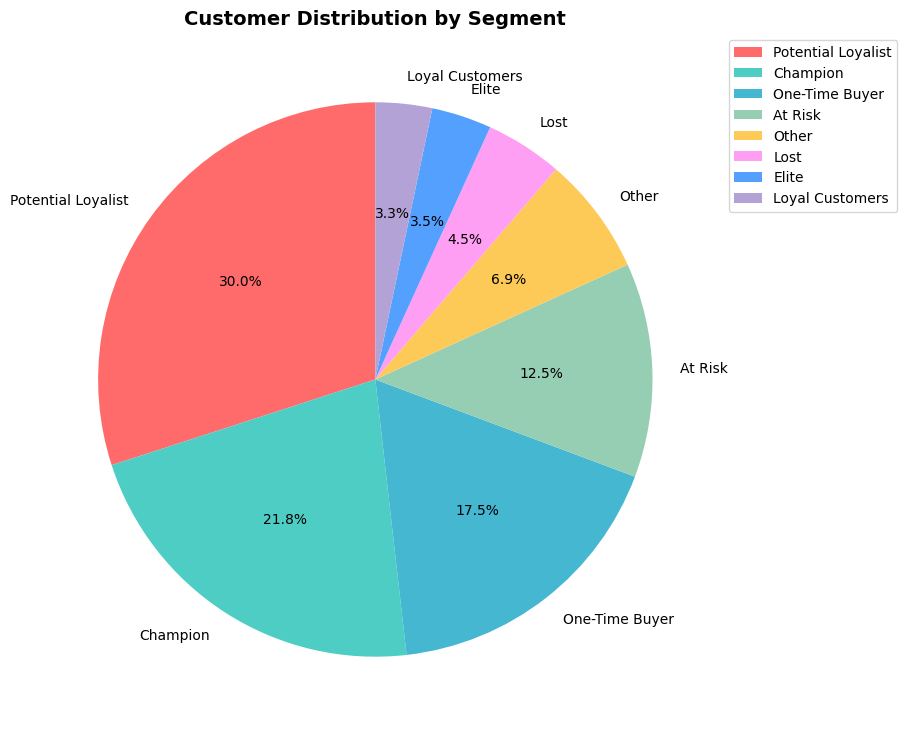

In [88]:
plt.figure(figsize=(9, 9))

segment_counts = rfm['SegmentLabel'].value_counts()

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', 
          '#FF9FF3', '#54A0FF', "#B3A2D5", '#00D2D3', '#FF9F43']

plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)

plt.legend(segment_counts.index, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Customer Distribution by Segment', fontweight='bold', fontsize=14)
plt.show()



***

# 2. Revenue Contribution per Segment   

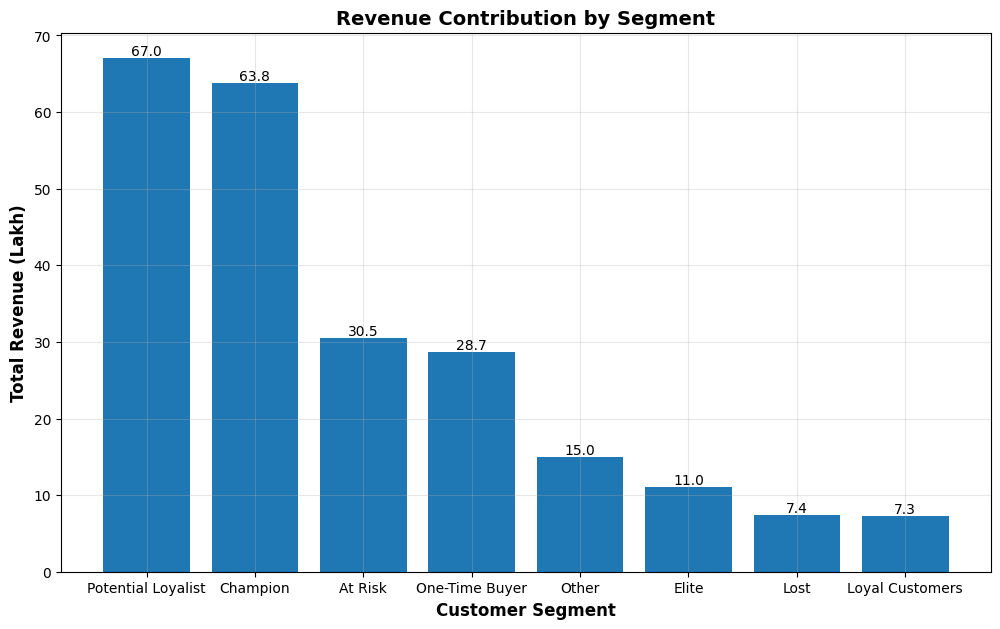

In [89]:
plt.figure(figsize=(12, 7))

revenue_by_segment = (
    rfm.groupby('SegmentLabel')['Monetary']
    .sum()
    .sort_values(ascending=False) / 100000
)

plt.bar(revenue_by_segment.index, revenue_by_segment.values)

for i, v in enumerate(revenue_by_segment.values):
    plt.text(i, v, f'{v:,.1f}', ha='center', va='bottom')

plt.title('Revenue Contribution by Segment', fontweight='bold', fontsize=14)
plt.ylabel('Total Revenue (Lakh)', fontweight='bold', fontsize=12)
plt.xlabel('Customer Segment', fontweight='bold', fontsize=12)
plt.grid(True, alpha=0.3)


plt.show()


***

# 3. Recency vs Monetary Scatter Plot

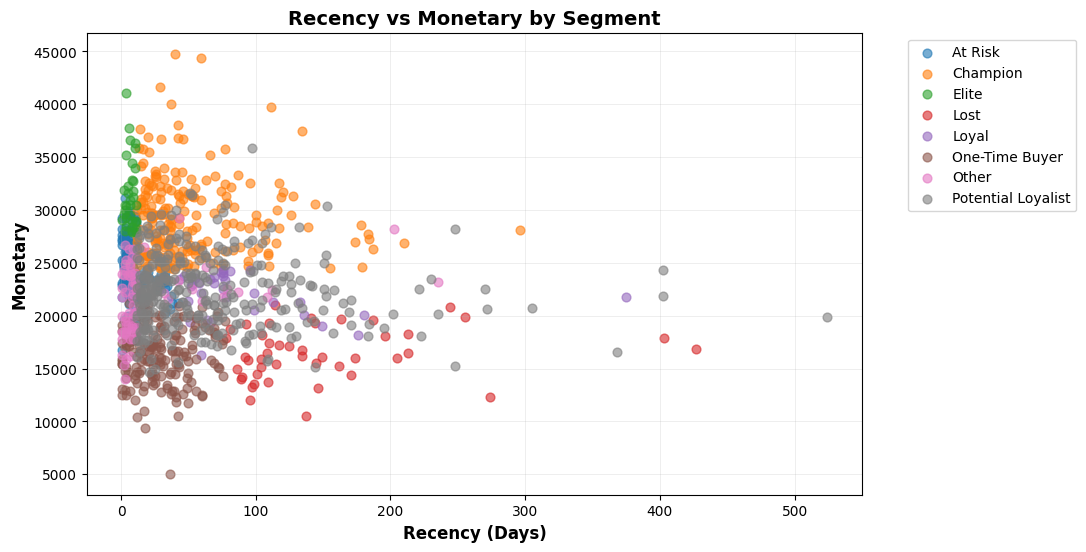

In [71]:
plt.figure(figsize=(10, 6))

for segment, subset in rfm.groupby('SegmentLabel'):
    plt.scatter(
        subset['Recency'],
        subset['Monetary'],   # convert to lakh for readability
        label=segment,
        alpha=0.6,
        s=40
    )

plt.title('Recency vs Monetary by Segment', fontweight='bold', fontsize=14)
plt.xlabel('Recency (Days)', fontweight='bold', fontsize=12)
plt.ylabel('Monetary', fontweight='bold', fontsize=12)
plt.grid(alpha=0.3, linewidth=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


***

# 4. Pareto Analysis

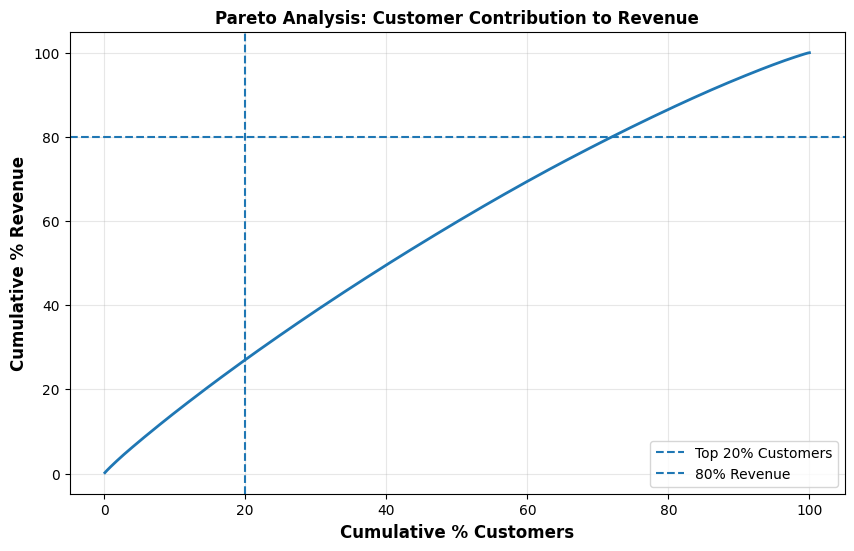

In [90]:
plt.figure(figsize=(10, 6))

rfm_sorted = rfm.sort_values('Monetary', ascending=False).reset_index(drop=True)

rfm_sorted['cum_rev'] = (rfm_sorted['Monetary'].cumsum() / rfm_sorted['Monetary'].sum()) * 100

rfm_sorted['cum_cust'] = (np.arange(1, len(rfm_sorted) + 1) / len(rfm_sorted)) * 100

plt.plot(rfm_sorted['cum_cust'], rfm_sorted['cum_rev'], linewidth=2)
plt.axvline(20, linestyle='--', label='Top 20% Customers')
plt.axhline(80, linestyle='--', label='80% Revenue')

plt.title('Pareto Analysis: Customer Contribution to Revenue', fontweight='bold')
plt.xlabel('Cumulative % Customers', fontweight='bold', fontsize=12)
plt.ylabel('Cumulative % Revenue', fontweight='bold', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()


***

# 8. Summary

In [91]:
summary = rfm.groupby('SegmentLabel').agg(
    Customers=('CustomerID', 'count'),
    Revenue=('Monetary', 'sum')
).reset_index()

summary['% Customers'] = (
    summary['Customers'] / summary['Customers'].sum()
) * 100

summary['% Revenue'] = (
    summary['Revenue'] / summary['Revenue'].sum()
) * 100

summary = summary.sort_values('% Revenue', ascending=False)

summary


,SegmentLabel,Customers,Revenue,% Customers,% Revenue
7,Potential Loyalist,300,6700536.95,30.0,29.065540
1,Champion,218,6376900.73,21.8,27.661673
0,At Risk,125,3046364.62,12.5,13.214498
5,One-Time Buyer,175,2866446.63,17.5,12.434051
6,Other,69,1498339.69,6.9,6.499487
2,Elite,35,1099393.85,3.5,4.768943
3,Lost,45,740165.08,4.5,3.210683
4,Loyal Customers,33,725052.11,3.3,3.145126


***

In [92]:
summary.style.format({
    'Revenue': '₹{:,.0f}',
    '% Customers': '{:.1f}%',
    '% Revenue': '{:.1f}%'
})


,SegmentLabel,Customers,Revenue,% Customers,% Revenue
7,Potential Loyalist,300,"₹6,700,537",30.0%,29.1%
1,Champion,218,"₹6,376,901",21.8%,27.7%
0,At Risk,125,"₹3,046,365",12.5%,13.2%
5,One-Time Buyer,175,"₹2,866,447",17.5%,12.4%
6,Other,69,"₹1,498,340",6.9%,6.5%
2,Elite,35,"₹1,099,394",3.5%,4.8%
3,Lost,45,"₹740,165",4.5%,3.2%
4,Loyal Customers,33,"₹725,052",3.3%,3.1%


In [93]:
top_segment = summary.iloc[0]
print(f"Revenue concentration risk: {top_segment['% Revenue']:.1f}% revenue depends on {top_segment['SegmentLabel']}.")


Revenue concentration risk: 29.1% revenue depends on Potential Loyalist.


***Top revenue segment is POTENTIAL LOYALIST.***

***Lowest revenue segment is LOYAL CUSTOMERS.***

***One-Time Buyer segment has high customers but low revenue***

***Champion segment has low customers but high revenue***

***Potential Loyalists are the top revenue segment, contributing 29.1% of total revenue.***

***Champions generate 27.7% of revenue from 21.8% of customers, showing strong monetization.***

***One-Time Buyers represent 17.5% of customers but contribute only 12.4% revenue, indicating low repeat value.***

***Loyal Customers segment underperforms with only 3.1% revenue share.***

***Revenue is primarily driven by Potential Loyalists and Champions (56.7% combined).***

***